In [4]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [5]:

# Load data
df = pd.read_excel("student.csv.xlsx")


In [11]:
df.head()

,maths,English,gender,admitted
0,74,61,1,NO
1,63,95,1,NO
2,55,86,-1,NO
3,76,96,1,NO
4,88,68,-1,Yes


In [12]:
df.describe()

,maths,English,gender
count,562.000000,562.000000,562.000000
mean,75.729537,75.402135,-0.071174
std,14.337596,14.358978,0.998352
min,50.000000,50.000000,-1.000000
25%,64.000000,64.000000,-1.000000
50%,76.000000,76.000000,-1.000000
75%,89.000000,87.000000,1.000000
max,100.000000,100.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562 entries, 0 to 561
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   maths     562 non-null    int64 
 1   English   562 non-null    int64 
 2   gender    562 non-null    int64 
 3   admitted  562 non-null    object
dtypes: int64(3), object(1)
memory usage: 17.7+ KB


In [14]:
df.isnull()

,maths,English,gender,admitted
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
557,False,False,False,False
558,False,False,False,False
559,False,False,False,False
560,False,False,False,False


In [6]:

# Convert Gender to numerical
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else -1)

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['maths', 'English', 'gender']], df['admitted'], test_size=0.2, random_state=42)


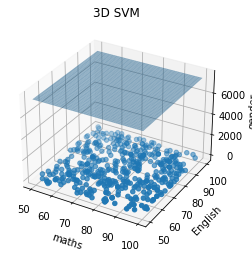

In [8]:
# Create 3D figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create meshgrid for plotting
X = np.linspace(df['maths'].min(), df['maths'].max(), 50)
Y = np.linspace(df['English'].min(), df['English'].max(), 50)
X, Y = np.meshgrid(X, Y)

# Fit SVM model
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Compute hyperplane
Z = (-clf.intercept_[0] - clf.coef_[0][0]*X - clf.coef_[0][1]*Y) / clf.coef_[0][2]

# Plot 3D scatter of training data
ax.scatter(X_train['maths'], X_train['English'], X_train['gender'])

# Plot hyperplane
ax.plot_surface(X, Y, Z, alpha=0.5)

# Set labels
ax.set_xlabel('maths')
ax.set_ylabel('English')
ax.set_zlabel('gender')
ax.set_title('3D SVM')

# Show plot
plt.show()

In [9]:

# Use the trained SVM model to make predictions on the testing set
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score
# Calculate the accuracy of the SVM model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.46017699115044247
